In [2]:
#!pip install xgboost

In [3]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

#from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
store_sales = pd.read_csv("train (1).csv")

In [5]:
store_sales.head(30)

,date,store,item,sales
0,1/1/2013,1,1,13
1,1/2/2013,1,1,11
2,1/3/2013,1,1,14
3,1/4/2013,1,1,13
4,1/5/2013,1,1,10
5,1/6/2013,1,1,12
6,1/7/2013,1,1,10
7,1/8/2013,1,1,9
8,1/9/2013,1,1,12
9,1/10/2013,1,1,9


In [6]:
store_sales = store_sales.drop(["store", "item"], axis=1)

In [7]:
store_sales.head()

,date,sales
0,1/1/2013,13
1,1/2/2013,11
2,1/3/2013,14
3,1/4/2013,13
4,1/5/2013,10


In [8]:
store_sales.dtypes

date     object
sales     int64
dtype: object

In [9]:
store_sales["date"] = pd.to_datetime(store_sales["date"])

In [10]:
store_sales.head()

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


In [11]:
store_sales["date"] = store_sales["date"].dt.to_period("M")

#to extract only the month
#data

In [12]:
store_sales.head(10)

,date,sales
0,2013-01,13
1,2013-01,11
2,2013-01,14
3,2013-01,13
4,2013-01,10
5,2013-01,12
6,2013-01,10
7,2013-01,9
8,2013-01,12
9,2013-01,9


In [13]:
#sum all the days in each month

monthly_sales = store_sales.groupby("date").sum()

In [14]:
pd.set_option("display.max_rows", None)

store_sales.head(30)

,date,sales
0,2013-01,13
1,2013-01,11
2,2013-01,14
3,2013-01,13
4,2013-01,10
5,2013-01,12
6,2013-01,10
7,2013-01,9
8,2013-01,12
9,2013-01,9


<AxesSubplot:>

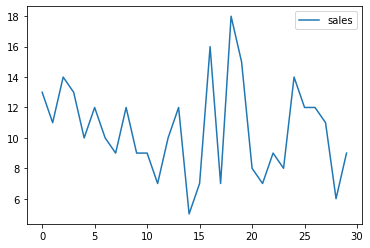

In [15]:
store_sales.head(30).plot(kind="line")

In [16]:
monthly_sales = store_sales.groupby("date").sum()

#grouping all the days in the month as one

In [17]:
monthly_sales = monthly_sales.reset_index()

In [18]:
monthly_sales

,date,sales
0,2013-01,454904
1,2013-02,459417
2,2013-03,617382
3,2013-04,682274
4,2013-05,763242
5,2013-06,795597
6,2013-07,855922
7,2013-08,766761
8,2013-09,689907
9,2013-10,656587


In [19]:
monthly_sales

,date,sales
0,2013-01,454904
1,2013-02,459417
2,2013-03,617382
3,2013-04,682274
4,2013-05,763242
5,2013-06,795597
6,2013-07,855922
7,2013-08,766761
8,2013-09,689907
9,2013-10,656587


In [20]:
monthly_sales

,date,sales
0,2013-01,454904
1,2013-02,459417
2,2013-03,617382
3,2013-04,682274
4,2013-05,763242
5,2013-06,795597
6,2013-07,855922
7,2013-08,766761
8,2013-09,689907
9,2013-10,656587


In [21]:
monthly_sales.dtypes

date     period[M]
sales        int64
dtype: object

In [22]:
monthly_sales["date"] = monthly_sales["date"].dt.to_timestamp()

In [23]:
monthly_sales.dtypes

date     datetime64[ns]
sales             int64
dtype: object

In [24]:
monthly_sales["date"]

0    2013-01-01
1    2013-02-01
2    2013-03-01
3    2013-04-01
4    2013-05-01
5    2013-06-01
6    2013-07-01
7    2013-08-01
8    2013-09-01
9    2013-10-01
10   2013-11-01
11   2013-12-01
12   2014-01-01
13   2014-02-01
14   2014-03-01
15   2014-04-01
16   2014-05-01
17   2014-06-01
18   2014-07-01
19   2014-08-01
20   2014-09-01
21   2014-10-01
22   2014-11-01
23   2014-12-01
24   2015-01-01
25   2015-02-01
26   2015-03-01
27   2015-04-01
28   2015-05-01
29   2015-06-01
30   2015-07-01
31   2015-08-01
32   2015-09-01
33   2015-10-01
34   2015-11-01
35   2015-12-01
36   2016-01-01
37   2016-02-01
38   2016-03-01
39   2016-04-01
40   2016-05-01
41   2016-06-01
42   2016-07-01
43   2016-08-01
44   2016-09-01
45   2016-10-01
46   2016-11-01
47   2016-12-01
48   2017-01-01
49   2017-02-01
50   2017-03-01
51   2017-04-01
52   2017-05-01
53   2017-06-01
54   2017-07-01
55   2017-08-01
56   2017-09-01
57   2017-10-01
58   2017-11-01
59   2017-12-01
Name: date, dtype: datetime64[ns]

Text(0.5, 1.0, 'Montly Customer Sales')

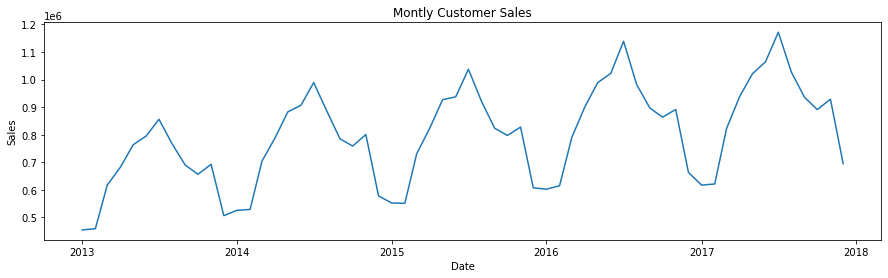

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))

plt.plot(monthly_sales["date"], monthly_sales["sales"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Montly Customer Sales")

In [26]:
monthly_sales["sales_diff"] = monthly_sales["sales"].diff()
monthly_sales = monthly_sales.dropna()

In [27]:
monthly_sales

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0


Text(0.5, 1.0, 'Montly Customer Sales')

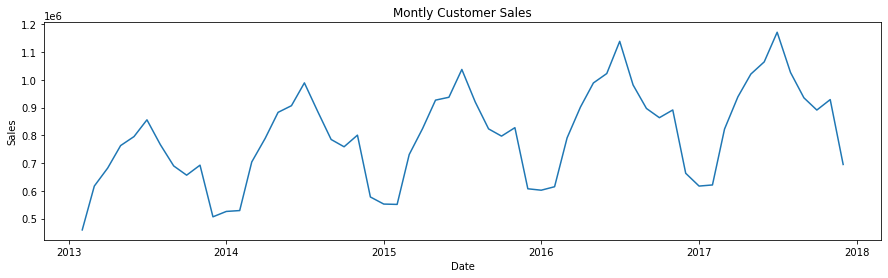

In [28]:
plt.figure(figsize=(15,4))

plt.plot(monthly_sales["date"], monthly_sales["sales"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Montly Customer Sales")

In [29]:
supervised_data = monthly_sales.drop(["date", "sales"], axis=1)

In [30]:
for i in range(1,13):
    col_name = "month_" + str(i)
    supervised_data[col_name] = supervised_data["sales_diff"].shift(i)
supervised_data = supervised_data.dropna().reset_index(drop=True)

In [31]:
supervised_data

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
5,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0
6,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0
7,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0
8,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0
9,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0


In [ ]:
import pandas as pd

pd.read_csv("train (1).csv")